<a id='top'></a>

# Record Linkage of 21st Club and TransferMarkt Datasets
##### Notebook on how join the scraped datasets from [21st Club](https://www.21stclub.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/)  through [RecordLinkage](https://pypi.org/project/recordlinkage/), to create one, enriched data source of player information, that can be used for for further analysis of players statistics against estimated market valuations.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Last updated: 13/09/2020

![title](../../img/21st_club.png)

![title](../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of scraped football statistics data from [21st Club](https://www.21stclub.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/), using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames, [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping, [RecordLinkage](https://pypi.org/project/recordlinkage/) to join the fuzzy data sets, and [matplotlib](https://matplotlib.org/) to create custom visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [github/eddwebster](https://github.com/eddwebster/), and 
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/fifa-league/blob/master/FIFA%2020%20Fantasy%20Football%20League%20using%20TransferMarkt%20Player%20Valuations.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Teams](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      2.    [Outfielder Players](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br>
      3.    [Goalkeepers](#section3.4)<br>
            1.    [Data Dictionary](#section3.4.1)<br>
            2.    [Creating the DataFrame](#section3.4.2)<br>
            3.    [Initial Data Handling](#section3.4.3)<br>
            4.    [Export the Raw DataFrame](#section3.4.4)<br> 
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Teams](#section4.2)<br>
            1.    [Columns of Interest](#section4.2.1)<br>
            2.    [String Cleaning](#section4.2.2)<br>
            3.    [Converting Data Types](#section4.2.3)<br>
            4.    [Export the Engineered DataFrame](#section4.2.4)<br>
      3.    [Outfielder Players](#section4.3)<br>
            1.    [Columns of Interest](#section4.3.1)<br>
            2.    [String Cleaning](#section4.3.2)<br>
            3.    [Converting Data Types](#section4.3.3)<br>
            4.    [Export the Engineered DataFrame](#section4.3.4)<br>
      4.    [Goalkeepers](#section4.4)<br>
            1.    [Columns of Interest](#section4.4.1)<br>
            2.    [String Cleaning](#section4.4.2)<br>
            3.    [Converting Data Types](#section4.4.3)<br>
            4.    [Export the Engineered DataFrame](#section4.4.4)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`RecordLinkage`](https://pypi.org/project/recordlinkage/) for joining of fuzzy datasets; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [90]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [91]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [92]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Define Data Paths

In [93]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_21st_club = os.path.join(base_dir, 'data', '21st_club')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to fuzzy match scraped football data from [21st Club](https://www.21stclub.com/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [RecordLinkage](https://pypi.org/project/recordlinkage/) and [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames.

The aims of this notebook is to result in two, finalised datasets of players and goalkeepers, exported to CSV. This data can be further analysis using python (see [Section 6](#section6) of this notebook), or can be explored using Tableau, PowerBI, Microsoft Excel.

The data used in this notebooks has been scraped using the [21st Club](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/FBref.ipynb) and [TransferMarkt](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt.ipynb) webscraping notebooks.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into two subsections for the 21st Club and TransferMarkt datasets.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. 21st Club</a>

#### <a id='#section3.2.1'>3.2.1. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `season`    | object    |
| `competition_id`    | int64    |
| `competition`    | object    |
| `player_id`    | int64    |
| `name`    | object    |
| `team_id`    | int64    |
| `team`    | object    |
| `age`    | float64    |
| `nationality`    | object    |
| `height`    | int64    |
| `weight`    | int64    |
| `preferred_foot`    | object    |
| `position`    | object    |
| `detailed_position`    | object    |
| `goals`    | int64    |
| `assists`    | int64    |
| `position_am_perc`    | float64    |
| `position_cb_perc`    | float64    |
| `position_cf_perc`    | float64    |
| `position_cm_perc`    | float64    |
| `position_dm_perc`    | float64    |
| `position_gk_perc`    | float64    |
| `position_lb_perc`    | float64    |
| `position_lw_perc`    | float64    |
| `position_rb_perc`    | float64    |
| `position_rw_perc`    | float64    |
| `play_time`    | int64    |
| `ball_in_play_time`    | int64    |
| `shots`    | int64    |
| `shots_open_play`    | int64    |
| `shots_open_play_box`    | int64    |
| `shots_op_left_foot`    | int64    |
| `shots_op_right_foot`    | int64    |
| `shots_op_head`    | int64    |
| `crosses`    | int64    |
| `crosses_open_play`    | int64    |
| `crosses_op_successful`    | int64    |
| `crosses_op_left`    | int64    |
| `crosses_op_right`    | int64    |
| `passes`    | int64    |
| `passes_open_play`    | int64    |
| `passes_op_successful`    | int64    |
| `passes_op_head`    | int64    |
| `passes_op_head_successful`    | int64    |
| `passes_op_final_third`    | int64    |
| `passes_op_final_third_successful`    | int64    |
| `passes_op_box`    | int64    |
| `passes_op_box_successful`    | int64    |
| `launches`    | int64    |
| `launches_successful`    | int64    |
| `carries`    | int64    |
| `carries_box`    | int64    |
| `carry_distance`    | float64    |
| `dribbles`    | int64    |
| `dribbles_successful`    | int64    |
| `dribbles_box`    | int64    |
| `recoveries`    | int64    |
| `tackles`    | int64    |
| `interceptions`    | int64    |
| `blocks`    | int64    |
| `clearances`    | int64     |
| `saves`    | int64     |
| `aerial_duels_att`    | int64    |
| `aerial_duels_att_won`    | int64    |
| `ground_duels_att`    | int64    |
| `ground_duels_att_won`    | int64     |
| `aerial_duels_def`    | int64    |
| `aerial_duels_def_won`    | int64    |
| `ground_duels_def`    | int64     |
| `ground_duels_def_won`    | int64     |

#### <a id='#section3.2.2'>3.2.2. Import the Dataset</a>

In [94]:
# Import CSV file as a pandas DataFrame, df_21stclub_raw

## Define filepath
filepath_data = os.path.join(data_dir_21st_club, 'engineered/21st_club_all.csv')

## Create DataFrame
df_21stclub_raw = pd.read_csv(filepath_data)

#### <a id='#section3.2.3'>3.2.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [95]:
# Display the first 5 rows of the raw DataFrame, df_21stclub_raw
df_21stclub_raw.head()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won,name_lower,firstname_lower,lastname_lower,firstinitial_lower
0,2018/2019,70,Championship,173879,Tamaraebi Abraham,7,Aston Villa,22.0,England,190.0,...,125,59,35,22,40,24,tamaraebi abraham,tamaraebi,abraham,t
1,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,7,7,18,1,0,0,dean henderson,dean,henderson,d
2,2018/2019,70,Championship,108416,John Egan,49,Sheffield United,27.0,Republic of Ireland,185.0,...,21,17,240,82,57,32,john egan,john,egan,j
3,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,106,43,15,10,74,39,mason mount,mason,mount,m
4,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,29,25,245,73,30,19,jack o'connell,jack,o'connell,j


In [96]:
# Display the last 5 rows of the raw DataFrame, df_21stclub_raw
df_21stclub_raw.tail()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won,name_lower,firstname_lower,lastname_lower,firstinitial_lower
2626,2019/2020,32,League Two,223827,Daniel Ballard,46,Swindon Town,20.0,Northern Ireland,187.0,...,0,0,0,0,0,0,daniel ballard,daniel,ballard,d
2627,2019/2020,32,League Two,217199,Jack Kiersey,42,Walsall,21.0,England,NaN,...,0,0,4,1,1,0,jack kiersey,jack,kiersey,j
2628,2018/2019,70,Championship,221824,Lewis Walker,52,Queens Park Rangers,22.0,England,NaN,...,3,0,1,1,1,1,lewis walker,lewis,walker,l
2629,2018/2019,70,Championship,209412,Ryan East,108,Reading,22.0,England,NaN,...,1,1,0,0,0,0,ryan east,ryan,east,r
2630,2018/2019,70,Championship,435858,Fraser Preston,19,Sheffield Wednesday,21.0,Scotland,NaN,...,0,0,0,0,0,0,fraser preston,fraser,preston,f


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [97]:
# Print the shape of the raw DataFrame, df_21stclub_raw
print(df_21stclub_raw.shape)

(2631, 74)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [98]:
# Features (column names) of the raw DataFrame, df_21stclub_raw
df_21stclub_raw.columns

Index(['season', 'competition_id', 'competition', 'player_id', 'name',
       'team_id', 'team', 'age', 'nationality', 'height', 'weight',
       'preferred_foot', 'position', 'detailed_position', 'goals', 'assists',
       'position_am_perc', 'position_cb_perc', 'position_cf_perc',
       'position_cm_perc', 'position_dm_perc', 'position_gk_perc',
       'position_lb_perc', 'position_lw_perc', 'position_rb_perc',
       'position_rw_perc', 'play_time', 'ball_in_play_time', 'shots',
       'shots_open_play', 'shots_open_play_box', 'shots_op_left_foot',
       'shots_op_right_foot', 'shots_op_head', 'crosses', 'crosses_open_play',
       'crosses_op_successful', 'crosses_op_left', 'crosses_op_right',
       'passes', 'passes_open_play', 'passes_op_successful', 'passes_op_head',
       'passes_op_head_successful', 'passes_op_final_third',
       'passes_op_final_third_successful', 'passes_op_box',
       'passes_op_box_successful', 'launches', 'launches_successful',
       'carries', 'ca

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [99]:
# Data types of the features of the raw DataFrame, df_21stclub_raw
df_21stclub_raw.dtypes

season                  object
competition_id           int64
competition             object
player_id                int64
name                    object
                         ...  
ground_duels_def_won     int64
name_lower              object
firstname_lower         object
lastname_lower          object
firstinitial_lower      object
Length: 74, dtype: object

In [100]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_21stclub_raw.dtypes)

season                               object
competition_id                        int64
competition                          object
player_id                             int64
name                                 object
team_id                               int64
team                                 object
age                                 float64
nationality                          object
height                              float64
weight                              float64
preferred_foot                       object
position                             object
detailed_position                    object
goals                                 int64
assists                               int64
position_am_perc                    float64
position_cb_perc                    float64
position_cf_perc                    float64
position_cm_perc                    float64
position_dm_perc                    float64
position_gk_perc                    float64
position_lb_perc                

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [101]:
# Info for the raw DataFrame, df_21stclub_raw
df_21stclub_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 74 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season                            2631 non-null   object 
 1   competition_id                    2631 non-null   int64  
 2   competition                       2631 non-null   object 
 3   player_id                         2631 non-null   int64  
 4   name                              2631 non-null   object 
 5   team_id                           2631 non-null   int64  
 6   team                              2631 non-null   object 
 7   age                               2617 non-null   float64
 8   nationality                       2631 non-null   object 
 9   height                            2336 non-null   float64
 10  weight                            2239 non-null   float64
 11  preferred_foot                    1851 non-null   object 
 12  positi

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [102]:
# Description of the raw DataFrame, df_21stclub_raw, showing some summary statistics for each numberical column in the DataFrame
df_21stclub_raw.describe()

,competition_id,player_id,team_id,age,height,weight,goals,assists,position_am_perc,position_cb_perc,...,clearances,saves,aerial_duels_att,aerial_duels_att_won,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won
count,2631.000000,2631.000000,2631.000000,2617.000000,2336.000000,2239.000000,2631.000000,2631.000000,2596.000000,2596.000000,...,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000
mean,47.625238,144087.258837,197.521475,26.388613,181.923373,75.041983,1.969593,1.336374,4.687982,17.388290,...,28.171038,3.665146,32.652604,13.293425,27.160015,14.163056,33.787153,13.710756,27.253136,14.059293
std,23.623605,106297.991456,529.506675,4.516356,6.560712,6.956653,3.333410,2.016973,12.252942,34.875405,...,41.947256,16.899254,62.690642,29.230508,30.657544,16.215974,49.783092,18.142118,27.306564,14.381583
min,15.000000,1409.000000,2.000000,16.000000,156.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,62623.500000,40.000000,23.000000,178.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,3.000000,1.000000,5.000000,2.000000,4.000000,1.000000,5.000000,2.000000
50%,70.000000,123352.000000,77.000000,26.000000,182.000000,75.000000,1.000000,1.000000,0.000000,0.000000,...,12.000000,0.000000,13.000000,5.000000,17.000000,9.000000,13.000000,7.000000,19.000000,10.000000
75%,70.000000,196409.000000,106.000000,29.000000,186.000000,80.000000,3.000000,2.000000,3.000000,4.000000,...,34.000000,0.000000,35.000000,13.000000,38.000000,20.000000,42.000000,19.000000,42.000000,22.000000
max,70.000000,497726.000000,3448.000000,41.000000,205.000000,102.000000,29.000000,16.000000,98.000000,100.000000,...,279.000000,163.000000,927.000000,518.000000,231.000000,159.000000,305.000000,112.000000,186.000000,97.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

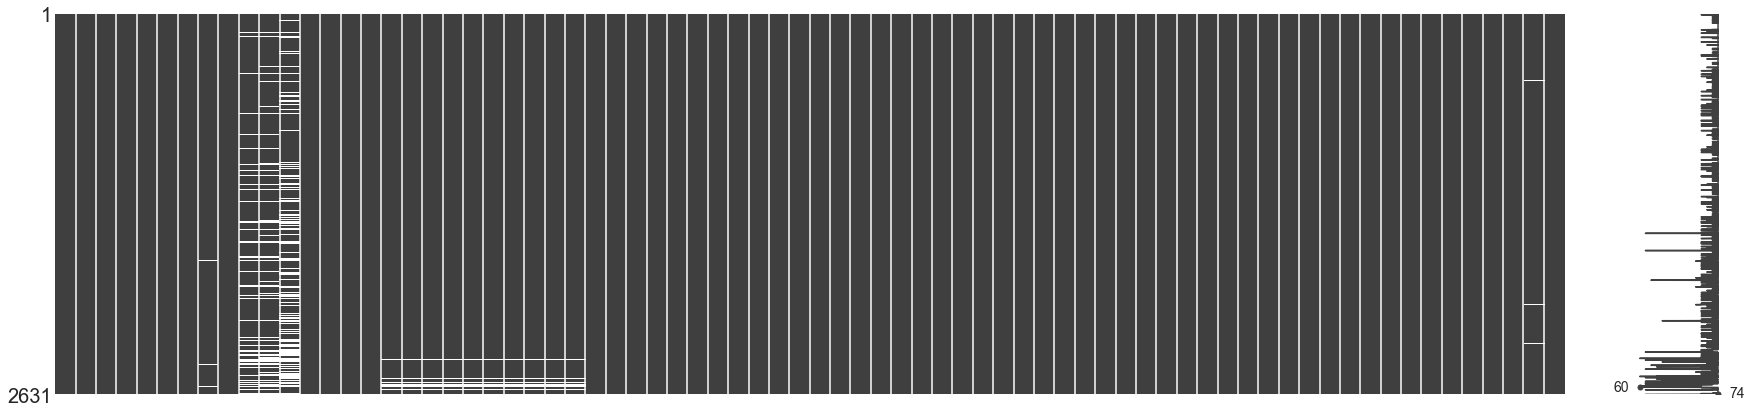

In [103]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_21stclub_raw
msno.matrix(df_21stclub_raw, figsize = (30, 7))

In [104]:
# Counts of missing values
null_value_stats = df_21stclub_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

age                  14
height              295
weight              392
preferred_foot      780
position_am_perc     35
position_cb_perc     35
position_cf_perc     35
position_cm_perc     35
position_dm_perc     35
position_gk_perc     35
position_lb_perc     35
position_lw_perc     35
position_rb_perc     35
position_rw_perc     35
lastname_lower        4
dtype: int64

The visualisation shows us very quickly that there are no missing values in either of the datasets.

### <a id='#section3.3'>3.3. TransferMarkt</a>

#### <a id='#section3.3.1'>3.3.1. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has x features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `season`    | object    |

#### <a id='#section3.3.2'>3.3.2. Import the Dataset</a>

In [105]:
# Import data as a pandas DataFrame, df_tm_raw 

## Look for most recent CSV file
list_of_files_tm = glob.glob(data_dir_tm + '/engineered/all/*')    # * means all if need specific format then *.csv
filepath_latest_tm = max(list_of_files_tm, key=os.path.getctime)

## Load in most recently parsed CSV file
df_tm_raw = pd.read_csv(filepath_latest_tm)

#### <a id='#section3.3.3'>3.3.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [106]:
# Display the first 5 rows of the raw DataFrame, df_tm_raw
df_tm_raw.head()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
0,Ederson,ederson,e,ederson,ederson,Goalkeeper,Goalkeeper,50400000.0,1993-08-17,1993.0,8.0,27.0,Brazil
1,Zack Steffen,zack steffen,z,zack,steffen,Goalkeeper,Goalkeeper,5400000.0,1995-04-02,1995.0,4.0,25.0,United States
2,Arijanet Muric,arijanet muric,a,arijanet,muric,Goalkeeper,Goalkeeper,1620000.0,1998-11-07,1998.0,11.0,21.0,Kosovo
3,Scott Carson,scott carson,s,scott,carson,Goalkeeper,Goalkeeper,720000.0,1985-09-03,1985.0,9.0,35.0,England
4,Aymeric Laporte,aymeric laporte,a,aymeric,laporte,Centre-Back,Defender,54000000.0,1994-05-27,1994.0,5.0,26.0,France


In [107]:
# Display the last 5 rows of the raw DataFrame, df_tm_raw
df_tm_raw.tail()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
2919,Harry Hamblin,harry hamblin,h,harry,hamblin,Defensive Midfield,Attacker,NaN,1999-10-13,1999.0,10.0,20.0,England
2920,Jak McCourt,jak mccourt,j,jak,mccourt,Central Midfield,Midfielder,68000.0,1995-07-06,1995.0,7.0,25.0,England
2921,Sam Walker,sam walker,s,sam,walker,Central Midfield,Midfielder,NaN,1987-04-15,1987.0,4.0,33.0,England
2922,Chay Tilt,chay tilt,c,chay,tilt,Right Midfield,Midfielder,NaN,1997-09-18,1997.0,9.0,22.0,England
2923,Wilson Carvalho,wilson carvalho,w,wilson,carvalho,Centre-Forward,Attacker,NaN,1993-07-04,1993.0,7.0,27.0,Portugal


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [108]:
# Print the shape of the raw DataFrame, df_tm_raw
print(df_tm_raw.shape)

(2924, 13)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [109]:
# Features (column names) of the raw DataFrame, df_21stclub_raw
df_21stclub_raw.columns

Index(['season', 'competition_id', 'competition', 'player_id', 'name',
       'team_id', 'team', 'age', 'nationality', 'height', 'weight',
       'preferred_foot', 'position', 'detailed_position', 'goals', 'assists',
       'position_am_perc', 'position_cb_perc', 'position_cf_perc',
       'position_cm_perc', 'position_dm_perc', 'position_gk_perc',
       'position_lb_perc', 'position_lw_perc', 'position_rb_perc',
       'position_rw_perc', 'play_time', 'ball_in_play_time', 'shots',
       'shots_open_play', 'shots_open_play_box', 'shots_op_left_foot',
       'shots_op_right_foot', 'shots_op_head', 'crosses', 'crosses_open_play',
       'crosses_op_successful', 'crosses_op_left', 'crosses_op_right',
       'passes', 'passes_open_play', 'passes_op_successful', 'passes_op_head',
       'passes_op_head_successful', 'passes_op_final_third',
       'passes_op_final_third_successful', 'passes_op_box',
       'passes_op_box_successful', 'launches', 'launches_successful',
       'carries', 'ca

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [110]:
# Data types of the features of the raw DataFrame, df_tm_raw
df_tm_raw.dtypes

name                             object
name_lower                       object
firstinitial_lower               object
firstname_lower                  object
lastname_lower                   object
position_description             object
position_description_cleaned     object
value                           float64
birth_date                       object
birth_year                      float64
birth_month                     float64
age                             float64
playing_country                  object
dtype: object

In [111]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tm_raw.dtypes)

name                             object
name_lower                       object
firstinitial_lower               object
firstname_lower                  object
lastname_lower                   object
position_description             object
position_description_cleaned     object
value                           float64
birth_date                       object
birth_year                      float64
birth_month                     float64
age                             float64
playing_country                  object
dtype: object


The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [112]:
# Info for the raw DataFrame, df_tm_raw
df_tm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          2924 non-null   object 
 1   name_lower                    2924 non-null   object 
 2   firstinitial_lower            2924 non-null   object 
 3   firstname_lower               2924 non-null   object 
 4   lastname_lower                2924 non-null   object 
 5   position_description          2924 non-null   object 
 6   position_description_cleaned  2878 non-null   object 
 7   value                         2097 non-null   float64
 8   birth_date                    2890 non-null   object 
 9   birth_year                    2890 non-null   float64
 10  birth_month                   2890 non-null   float64
 11  age                           2890 non-null   float64
 12  playing_country               2924 non-null   object 
dtypes: 

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [113]:
# Description of the raw DataFrame, df_tm_raw, showing some summary statistics for each numberical column in the DataFrame
df_tm_raw.describe()

,value,birth_year,birth_month,age
count,2.097000e+03,2890.000000,2890.000000,2890.000000
mean,4.269400e+06,1994.447405,6.586851,25.208651
std,1.074808e+07,4.503777,3.589179,4.531463
min,2.300000e+04,1979.000000,1.000000,16.000000
25%,1.350000e+05,1991.000000,3.000000,22.000000
50%,3.600000e+05,1995.000000,7.000000,25.000000
75%,2.880000e+06,1998.000000,10.000000,28.000000
max,1.152000e+08,2004.000000,12.000000,41.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

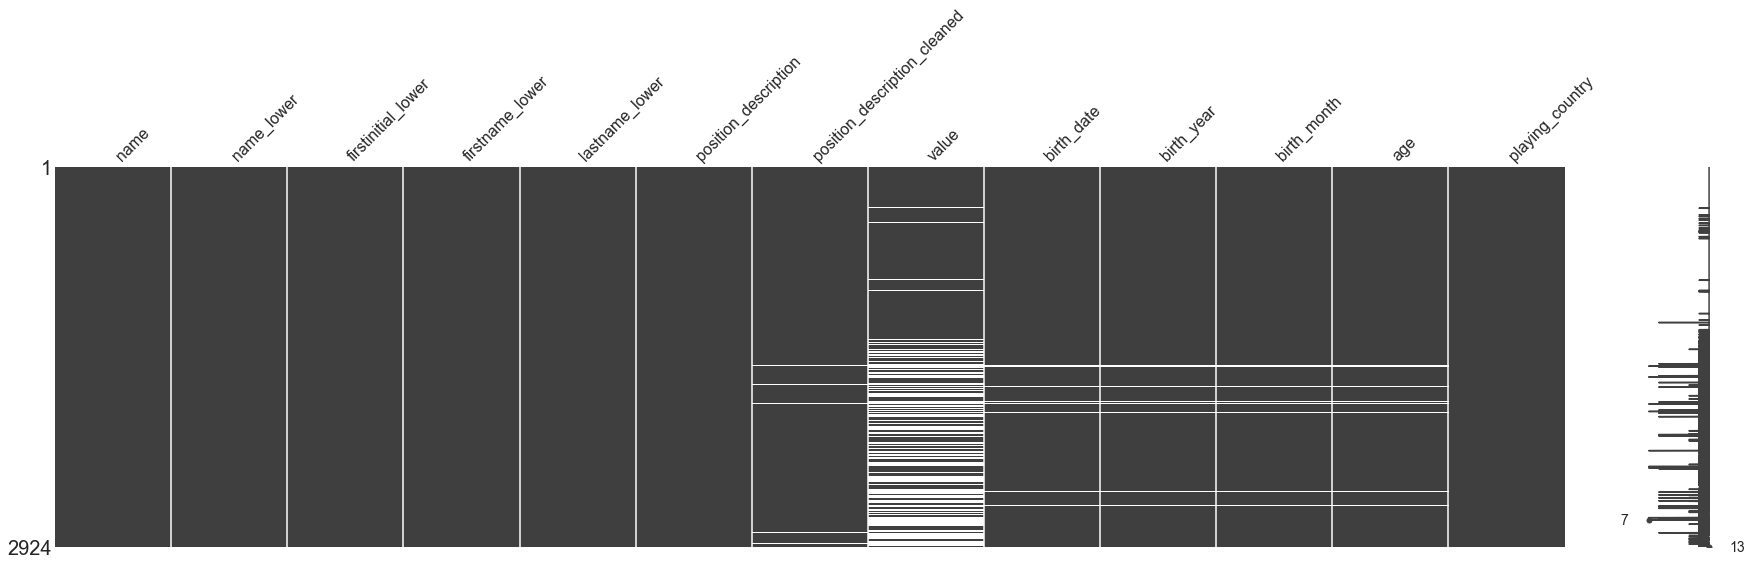

In [114]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_raw
msno.matrix(df_tm_raw, figsize = (30, 7))

In [115]:
# Counts of missing values
null_value_stats = df_tm_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

position_description_cleaned     46
value                           827
birth_date                       34
birth_year                       34
birth_month                      34
age                              34
dtype: int64

The visualisation shows us very quickly that there very few missing values in either of the outfield or goalkeeper datasets, and therefore this data is ready to be joined to the [21st Club](https://www.21stclub.com/) data.

## <a id='#section4'>4. Fuzzy Match Datasets - Record Linkage</a>

### <a id='#section4.1'>4.1. Introduction</a>
Now we have our two engineered DataFrames for [21st Club](https://www.21stclub.com/) and [TransferMarkt](https://www.transfermarkt.co.uk/) data, we are now read to merge them to form one dataset.

We are required to join two data sets together that do not have a common unique identifier and are required to use a third-party Python library - [record linkage](https://pypi.org/project/recordlinkage/), installed using pip install recordlinkage. [record linkage](https://pypi.org/project/recordlinkage/) provides a simple interface to link records in or between data sources. 

<b>'Record linkage'</b> is the term used by statisticians, epidemiologists, and historians, among others, to describe the process of joining records from one data source with another that describe the same entity ([source](https://en.wikipedia.org/wiki/Record_linkage)).

Record linkage is necessary when joining different data sets based on entities that may or may not share a common identifier (e.g., database key, URI, National identification number), which may be due to differences in record shape, storage location, or curator style or preference. A data set that has undergone RL-oriented reconciliation may be referred to as being cross-linked. Record linkage is referred to as data linkage in many jurisdictions, but the two are the same process.

The toolkit provides most of the tools needed for record linkage and deduplication. The package contains indexing methods, functions to compare records and classifiers. The package is developed for research and the linking of small or medium sized files.

For a full guide on how to use record linkage, see the official documentation [here](https://recordlinkage.readthedocs.io/en/latest/) and also this worked example by [Chris Moffitt](https://twitter.com/chris1610) [here](https://pbpython.com/record-linking.html)

### <a id='#section4.2'>4.2. Join the Datasets using Record Linkage</a>
The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [116]:
df_21stclub_raw.head()

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,ground_duels_att,ground_duels_att_won,aerial_duels_def,aerial_duels_def_won,ground_duels_def,ground_duels_def_won,name_lower,firstname_lower,lastname_lower,firstinitial_lower
0,2018/2019,70,Championship,173879,Tamaraebi Abraham,7,Aston Villa,22.0,England,190.0,...,125,59,35,22,40,24,tamaraebi abraham,tamaraebi,abraham,t
1,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,7,7,18,1,0,0,dean henderson,dean,henderson,d
2,2018/2019,70,Championship,108416,John Egan,49,Sheffield United,27.0,Republic of Ireland,185.0,...,21,17,240,82,57,32,john egan,john,egan,j
3,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,106,43,15,10,74,39,mason mount,mason,mount,m
4,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,29,25,245,73,30,19,jack o'connell,jack,o'connell,j


In [117]:
df_tm_raw.head()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
0,Ederson,ederson,e,ederson,ederson,Goalkeeper,Goalkeeper,50400000.0,1993-08-17,1993.0,8.0,27.0,Brazil
1,Zack Steffen,zack steffen,z,zack,steffen,Goalkeeper,Goalkeeper,5400000.0,1995-04-02,1995.0,4.0,25.0,United States
2,Arijanet Muric,arijanet muric,a,arijanet,muric,Goalkeeper,Goalkeeper,1620000.0,1998-11-07,1998.0,11.0,21.0,Kosovo
3,Scott Carson,scott carson,s,scott,carson,Goalkeeper,Goalkeeper,720000.0,1985-09-03,1985.0,9.0,35.0,England
4,Aymeric Laporte,aymeric laporte,a,aymeric,laporte,Centre-Back,Defender,54000000.0,1994-05-27,1994.0,5.0,26.0,France


In [118]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower'], 
              right_on = ['firstinitial_lower'])

<Index>

The next step is to build up all the potential candidates to check:

In [119]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_21stclub_raw, df_tm_raw)
print(len(candidates))

587695


Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [120]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality',
               'playing_country',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

features = compare.compute(candidates, df_21stclub_raw, df_tm_raw)

View the potential candidates

In [121]:
# Record Linkage Step 4 - view the potential candidates
features

first_name  last_name  position  nationality
0    10           0.0        0.0       0.0          1.0
     11           0.0        0.0       0.0          1.0
     41           0.0        0.0       0.0          1.0
     53           0.0        0.0       1.0          0.0
     60           0.0        0.0       1.0          0.0
...               ...        ...       ...          ...
2083 1241         0.0        0.0       1.0          0.0
     2354         0.0        0.0       0.0          0.0
2274 439          0.0        0.0       0.0          0.0
     1241         0.0        0.0       0.0          0.0
     2354         1.0        1.0       1.0          1.0

[587695 rows x 4 columns]

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [122]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

4.0      1456
3.0     11275
2.0     93065
1.0    257988
0.0    223911
dtype: int64

To only include high-quality matches, let’s just take all the records with 4 matches out of 4 and create a total score column:

In [123]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 4].reset_index()
potential_matches

,level_0,level_1,first_name,last_name,position,nationality
0,65,678,1.0,1.0,1.0,1.0
1,67,335,1.0,1.0,1.0,1.0
2,103,464,1.0,1.0,1.0,1.0
3,113,646,1.0,1.0,1.0,1.0
4,288,1141,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
1451,1213,1475,1.0,1.0,1.0,1.0
1452,1448,1592,1.0,1.0,1.0,1.0
1453,2246,2032,1.0,1.0,1.0,1.0
1454,2279,2304,1.0,1.0,1.0,1.0


In [124]:
potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'nationality'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,position,nationality,Score
0,65,678,1.0,1.0,1.0,1.0,4.0
1,67,335,1.0,1.0,1.0,1.0,4.0
2,103,464,1.0,1.0,1.0,1.0,4.0
3,113,646,1.0,1.0,1.0,1.0,4.0
4,288,1141,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...
1451,1213,1475,1.0,1.0,1.0,1.0,4.0
1452,1448,1592,1.0,1.0,1.0,1.0,4.0
1453,2246,2032,1.0,1.0,1.0,1.0,4.0
1454,2279,2304,1.0,1.0,1.0,1.0,4.0


In [125]:
# Join the 21st Club Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(potential_matches, df_21stclub_raw, left_on='level_0', right_index=True)

# Join the TransferMarkt Outfielder DataFrame to the potential matches DataFrame
df_merge = pd.merge(df_merge, df_tm_raw, left_on='level_1', right_index=True)

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [126]:
# Select columns of interest
cols_merge_outfield = ['name_x', 'name_y', 'nationality_x', 'nationality_y', 'position_x', 'position_y', 'value', 'birth_date', 'age_x', 'age_y', 'Score']

# Create more concise DataFrame using only columns of interest
df_merge_select = df_merge[cols_merge_outfield]

# Order rows by 'value' and matching 'Score' decending (i.e. best matches of 4 out of 4 at the top) 
df_merge_select = df_merge_select.sort_values(by=['value', 'name_y'], ascending=[False, True])

In [127]:
df_merge_select

,name_x,name_y,nationality_x,nationality_y,position_x,position_y,value,birth_date,age_x,age_y,Score
1200,Rodri,Rodri,1.0,Spain,1.0,Attacker,57600000.0,1996-06-22,30.0,24.0,4.0
455,Mason Mount,Mason Mount,1.0,England,1.0,Midfielder,36450000.0,1999-01-10,21.0,21.0,4.0
1201,Rodri,Rodrigo,1.0,Spain,1.0,Attacker,36000000.0,1991-03-06,30.0,29.0,4.0
80,Timmy Abraham,Tammy Abraham,1.0,England,1.0,Attacker,36000000.0,1997-10-02,19.0,22.0,4.0
173,Jarrod Bowen,Jarrod Bowen,1.0,England,1.0,Attacker,22500000.0,1996-12-20,23.0,23.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1445,Wes McDonald,Wes McDonald,1.0,England,1.0,Attacker,NaN,1997-05-04,23.0,23.0,4.0
1439,Will Keane,Will Dean,1.0,England,1.0,Attacker,NaN,2000-08-07,27.0,20.0,4.0
1440,Will Keane,Will Dean,1.0,England,1.0,Attacker,NaN,2000-08-07,27.0,20.0,4.0
1441,Will Keane,Will Dean,1.0,England,1.0,Attacker,NaN,2000-08-07,27.0,20.0,4.0


In [128]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final = pd.merge(df_21stclub_raw, df_merge_select, left_on='name', right_on='name_x')

In [129]:
df_final

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,name_y,nationality_x,nationality_y,position_x,position_y,value,birth_date,age_x,age_y,Score
0,2018/2019,70,Championship,172649,Dean Henderson,49,Sheffield United,23.0,England,188.0,...,Dean Henderson,1.0,England,1.0,Goalkeeper,18000000.0,1997-03-12,23.0,23.0,4.0
1,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,Mason Mount,1.0,England,1.0,Midfielder,36450000.0,1999-01-10,21.0,21.0,4.0
2,2018/2019,70,Championship,146610,Jack O'Connell,49,Sheffield United,26.0,England,190.0,...,Jack O'Connell,1.0,England,1.0,Defender,8550000.0,1994-03-29,26.0,26.0,4.0
3,2018/2019,70,Championship,178186,Jarrod Bowen,88,Hull City,23.0,England,NaN,...,Jarrod Bowen,1.0,England,1.0,Attacker,22500000.0,1996-12-20,23.0,23.0,4.0
4,2018/2019,70,Championship,178186,Jarrod Bowen,88,Hull City,23.0,England,NaN,...,Jarrod Bowen,1.0,England,1.0,Attacker,22500000.0,1996-12-20,23.0,23.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,2018/2019,70,Championship,441590,Jack Lankester,40,Ipswich Town,20.0,England,177.0,...,Jack Lankester,1.0,England,1.0,Attacker,135000.0,2000-01-19,20.0,20.0,4.0
2254,2018/2019,70,Championship,477330,Charlie Jolley,111,Wigan Athletic,19.0,England,NaN,...,Charlie Jolley,1.0,England,1.0,Attacker,90000.0,2001-01-13,19.0,19.0,4.0
2255,2019/2020,32,League Two,488713,Andre Hasanally,99,Colchester United,18.0,England,NaN,...,Andre Hasanally,1.0,England,1.0,Midfielder,NaN,2002-02-10,18.0,18.0,4.0
2256,2018/2019,70,Championship,87856,Michael Hefele,17,Nottingham Forest,30.0,Germany,192.0,...,Michael Hefele,1.0,Germany,1.0,Defender,360000.0,1990-09-01,30.0,30.0,4.0


In [130]:
df_final.columns

Index(['season', 'competition_id', 'competition', 'player_id', 'name',
       'team_id', 'team', 'age', 'nationality', 'height', 'weight',
       'preferred_foot', 'position', 'detailed_position', 'goals', 'assists',
       'position_am_perc', 'position_cb_perc', 'position_cf_perc',
       'position_cm_perc', 'position_dm_perc', 'position_gk_perc',
       'position_lb_perc', 'position_lw_perc', 'position_rb_perc',
       'position_rw_perc', 'play_time', 'ball_in_play_time', 'shots',
       'shots_open_play', 'shots_open_play_box', 'shots_op_left_foot',
       'shots_op_right_foot', 'shots_op_head', 'crosses', 'crosses_open_play',
       'crosses_op_successful', 'crosses_op_left', 'crosses_op_right',
       'passes', 'passes_open_play', 'passes_op_successful', 'passes_op_head',
       'passes_op_head_successful', 'passes_op_final_third',
       'passes_op_final_third_successful', 'passes_op_box',
       'passes_op_box_successful', 'launches', 'launches_successful',
       'carries', 'ca

In [131]:
# Select columns of interest
cols_final_outfield = ['season', 'competition_id', 'competition', 'player_id', 'name', 'team_id', 'team', 'age', 'nationality', 'height', 'weight', 'preferred_foot', 'position', 'detailed_position', 'goals', 'assists', 'position_am_perc', 'position_cb_perc', 'position_cf_perc', 'position_cm_perc', 'position_dm_perc', 'position_gk_perc', 'position_lb_perc', 'position_lw_perc', 'position_rb_perc', 'position_rw_perc', 'play_time', 'ball_in_play_time', 'shots', 'shots_open_play', 'shots_open_play_box', 'shots_op_left_foot', 'shots_op_right_foot', 'shots_op_head', 'crosses', 'crosses_open_play', 'crosses_op_successful', 'crosses_op_left', 'crosses_op_right', 'passes', 'passes_open_play', 'passes_op_successful', 'passes_op_head', 'passes_op_head_successful', 'passes_op_final_third', 'passes_op_final_third_successful', 'passes_op_box', 'passes_op_box_successful', 'launches', 'launches_successful', 'carries', 'carries_box', 'carry_distance', 'dribbles', 'dribbles_successful', 'dribbles_box', 'recoveries', 'tackles', 'interceptions', 'blocks', 'clearances', 'saves', 'aerial_duels_att', 'aerial_duels_att_won', 'ground_duels_att', 'ground_duels_att_won', 'aerial_duels_def', 'aerial_duels_def_won', 'ground_duels_def', 'ground_duels_def_won', 'name_y', 'nationality_y', 'position_y', 'value', 'birth_date', 'age_y', 'Score']
# cols_final_outfield = ['player', 'value', 'nationality_cleaned_y', 'position_description', 'squad', 'league_name', 'league_country', 'birth_date', 'age_y', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance', 'passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long', 'xa_net', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes', 'passes_live', 'passes_dead', 'passes_free_kicks', 'through_balls', 'passes_pressure', 'passes_switches', 'crosses', 'corner_kicks', 'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight', 'passes_ground', 'passes_low', 'passes_high', 'passes_left_foot', 'passes_right_foot', 'passes_head', 'throw_ins', 'passes_other_body', 'passes_offsides', 'passes_oob', 'passes_intercepted', 'passes_blocked', 'sca', 'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles', 'sca_shots', 'sca_fouled', 'gca', 'gca_per90', 'gca_passes_live', 'gca_passes_dead', 'gca_dribbles', 'gca_shots', 'gca_fouled', 'gca_og_for', 'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past', 'pressures', 'pressure_regains', 'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd', 'pressures_att_3rd', 'blocks', 'blocked_shots', 'blocked_shots_saves', 'blocked_passes', 'interceptions', 'clearances', 'errors', 'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball', 'dribbles_completed', 'dribbles', 'dribbles_completed_pct', 'players_dribbled_past', 'nutmegs', 'carries', 'carry_distance', 'carry_progressive_distance', 'pass_targets', 'passes_received', 'passes_received_pct', 'miscontrols', 'dispossessed', 'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct', 'Season', 'position_cleaned']

# Create more concise DataFrame using only columns of interest
df_final = df_final[cols_final_outfield]

# Order rows by matching score decending and name ascending (alphabetically) - i.e. best matches of 5 out of 5 at the top) 
df_final = df_final.sort_values(by=['value', 'name'], ascending=[False, True])

In [132]:
# Rename columns
df_final = df_final.rename(columns={'nationality_cleaned_y': 'nationality',
                                    'name_y': 'name',
                                    'nationality_y': 'nationality',
                                    'position_y': 'position',
                                    'age_y': 'age'
                                   }
                          )

In [133]:
df_final.shape

(2258, 77)

In [134]:
df_final = df_final.drop_duplicates()

In [135]:
df_final.shape

(1472, 77)

In [136]:
df_final

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,aerial_duels_def_won,ground_duels_def,ground_duels_def_won,name,nationality,position,value,birth_date,age,Score
662,2019/2020,70,Championship,81748,Rodri,113,Bristol City,30.0,Spain,175.0,...,0,7,6,Rodri,Spain,Attacker,57600000.0,1996-06-22,24.0,4.0
1,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,10,74,39,Mason Mount,England,Midfielder,36450000.0,1999-01-10,21.0,4.0
663,2019/2020,70,Championship,81748,Rodri,113,Bristol City,30.0,Spain,175.0,...,0,7,6,Rodrigo,Spain,Attacker,36000000.0,1991-03-06,29.0,4.0
2227,2019/2020,15,League One,422028,Timmy Abraham,96,Bristol Rovers,19.0,England,NaN,...,0,1,1,Tammy Abraham,England,Attacker,36000000.0,1997-10-02,22.0,4.0
3,2018/2019,70,Championship,178186,Jarrod Bowen,88,Hull City,23.0,England,NaN,...,23,81,31,Jarrod Bowen,England,Attacker,22500000.0,1996-12-20,23.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2019/2020,32,League Two,124494,Wes McDonald,42,Walsall,23.0,England,174.0,...,3,43,22,Wes McDonald,England,Attacker,NaN,1997-05-04,23.0,4.0
1496,2018/2019,70,Championship,91126,Will Keane,40,Ipswich Town,27.0,England,188.0,...,8,27,17,Will Dean,England,Attacker,NaN,2000-08-07,20.0,4.0
1499,2018/2019,70,Championship,91126,Will Keane,88,Hull City,27.0,England,188.0,...,1,4,3,Will Dean,England,Attacker,NaN,2000-08-07,20.0,4.0
1502,2019/2020,15,League One,91126,Will Keane,40,Ipswich Town,27.0,England,188.0,...,7,35,27,Will Dean,England,Attacker,NaN,2000-08-07,20.0,4.0


In [137]:
df_null = df_final[df_final['value'].isnull()]

In [138]:
df_null

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,aerial_duels_def_won,ground_duels_def,ground_duels_def_won,name,nationality,position,value,birth_date,age,Score
1942,2019/2020,32,League Two,179835,Aaron Hayden,68,Carlisle United,23.0,England,185.0,...,28,41,27,Aaron Hayden,England,Defender,NaN,1997-01-16,23.0,4.0
2135,2019/2020,15,League One,215828,Aaron Lewis,83,Lincoln City,22.0,Wales,183.0,...,0,1,1,Aaron Lewis,Wales,Defender,NaN,1998-06-26,22.0,4.0
1940,2019/2020,15,League One,231908,Aaron Morley,82,Rochdale,20.0,England,174.0,...,13,15,4,Aaron Morley,England,Midfielder,NaN,2000-02-27,20.0,4.0
1660,2019/2020,32,League Two,204971,Adam Crookes,50,Port Vale,22.0,England,182.0,...,36,25,10,Adam Crookes,England,Defender,NaN,1997-11-18,22.0,4.0
2196,2019/2020,15,League One,200872,Adam Roscrow,2623,AFC Wimbledon,25.0,Wales,NaN,...,0,1,1,Adam Roscrow,Wales,Attacker,NaN,1995-02-17,25.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2019/2020,32,League Two,124494,Wes McDonald,42,Walsall,23.0,England,174.0,...,3,43,22,Wes McDonald,England,Attacker,NaN,1997-05-04,23.0,4.0
1496,2018/2019,70,Championship,91126,Will Keane,40,Ipswich Town,27.0,England,188.0,...,8,27,17,Will Dean,England,Attacker,NaN,2000-08-07,20.0,4.0
1499,2018/2019,70,Championship,91126,Will Keane,88,Hull City,27.0,England,188.0,...,1,4,3,Will Dean,England,Attacker,NaN,2000-08-07,20.0,4.0
1502,2019/2020,15,League One,91126,Will Keane,40,Ipswich Town,27.0,England,188.0,...,7,35,27,Will Dean,England,Attacker,NaN,2000-08-07,20.0,4.0


On closer inspection, the player that have no matched are all youth team players that currently have no value of TransferMarkt, such as Brandon Pierrick of Crystal Palace.

Let's export the merged DataFrame, `df_final` as a CSV file.

In [139]:
# Export DataFrame as a CSV file

## Export a copy to the 'Archive' subfolder of the 21st_Club-TM folder, including the date
df_final.to_csv(data_dir + '/21st_club-tm/archive/' + f'21st_club_tm_england_last_updated_{today}.csv', index=None, header=True)

## Export another copy to the 21st Club-Tm folder called 'latest' (can be overwritten)
df_final.to_csv(data_dir + '/21st_club-tm/' + '21st_club_tm_england_latest.csv', index=None, header=True)

## Export a final copy to the 'Export' folder - this one is used for the Tableau visualisation
#df_final.to_csv(data_dir + '/export/' + '21st_club_tm_england.csv', index=None, header=True)

## <a id='#section5'>5. Exploratory Data Analysis</a>
...

In [154]:
import soccerplots
from soccerplots.radar_chart import Radar

In [152]:
df_mount_1920 = df_final.loc[(df_final['player_id'] == 184341) & (df_final['season'] == '2018/2019')]

In [153]:
df_mount_1920

,season,competition_id,competition,player_id,name,team_id,team,age,nationality,height,...,aerial_duels_def_won,ground_duels_def,ground_duels_def_won,name,nationality,position,value,birth_date,age,Score
1,2018/2019,70,Championship,184341,Mason Mount,24,Derby County,21.0,England,178.0,...,10,74,39,Mason Mount,England,Midfielder,36450000.0,1999-01-10,21.0,4.0


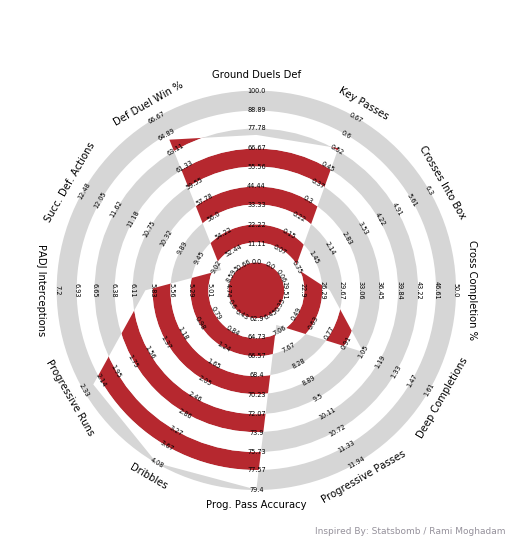

In [158]:
df_radar = df_mount_1920

## parameter names
#params = ['xAssist', 'Key Passes', 'Crosses Into Box', 'Cross Completion %', 'Deep Completions',
#          'Progressive Passes', 'Prog. Pass Accuracy', 'Dribbles', 'Progressive Runs',
#          'PADJ Interceptions', 'Succ. Def. Actions', 'Def Duel Win %']

params = ['Ground Duels Def', 'Key Passes', 'Crosses Into Box', 'Cross Completion %', 'Deep Completions',
          'Progressive Passes', 'Prog. Pass Accuracy', 'Dribbles', 'Progressive Runs',
          'PADJ Interceptions', 'Succ. Def. Actions', 'Def Duel Win %']

## range values
ranges = [(0.0, 100), (0.0, 0.67), (0.06, 6.3), (19.51, 50.0), (0.35, 1.61),
          (6.45, 11.94), (62.9, 79.4), (0.43, 4.08), (0.6, 2.33),
          (4.74, 7.2), (8.59, 12.48), (50.66, 66.67)]

## parameter value
values = [df_radar['ground_duels_def'].iloc[0], 0.53, 0.70, 27.66, 1.05, 6.84, 84.62, 4.56, 2.22, 5.93, 8.88, 64.29]

## instantiate object
radar = Radar()

## plot radar
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                                 radar_color=['#B6282F', '#FFFFFF'])

## <a id='#section6'>6. Summary</a>
This notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations to plot the data.

In this workbook, we have taken a dataset of train data and through Exploratory Data Analysis, determined the following:
*    Identified how many of each journey are run per day,
*    Subsetted this table such that it contains the 16 most common journeys per date, and
*    Identified 28th August 2015 as the day that the timetable was changed *via* a visualisation.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

### <a id='#section8.1'>8.1. Bibliography</a>

#### Fuzzy Matching through Record Linkage
*    Record Linkage Wiki: https://en.wikipedia.org/wiki/Record_linkage
*    The Python Package Index (PyPI) repository for the Companies House API that lists all the important GET and LIST methods for requesting data: https://pypi.org/project/companies-house/
*    [Official Record Linkage documentation web](https://recordlinkage.readthedocs.io/en/latest/about.html)
*    [Official Record Linkage documentation PDF](https://readthedocs.org/projects/recordlinkage/downloads/pdf/stable/)
     -    [0. Preprocessing](https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html)
     -    [1. Indexing](https://recordlinkage.readthedocs.io/en/latest/ref-index.html)
     -    [2. Comparing](https://recordlinkage.readthedocs.io/en/latest/ref-compare.html)
     -    [3. Classification](https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html)
     -    [4. Evaluation](https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html)
*    Evaluation:https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html
*    Companies House API docs: https://developer.companieshouse.gov.uk/api/docs/
*    Python Tools for Record Linking and Fuzzy Matching by Chris Moffitt: https://pbpython.com/record-linking.html
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    [Python Package Index (PyPI) Jellyfish library](https://pypi.org/project/jellyfish/).

## <a id='#section8.2'>8.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for plotting visualisations,
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages, and
*    [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) for linking fuzzy datasets.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)